In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [ ]:
data1 = pd.read_csv('Datosnotas.txt', header=None, names=['Score1', 'Score2', 'Admitted'])
data1.head()

,Score1,Score2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


# **Visualización de los datos**

Traza los datos creando una figura, donde los ejes son las dos puntuaciones de los exámenes, y los ejemplos positivos y negativos se muestran con marcadores diferentes.

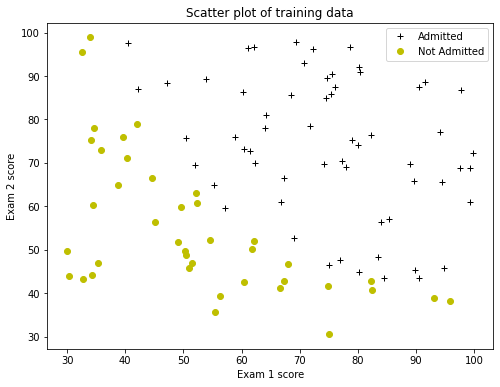

In [ ]:
plt.figure(figsize=(8, 6))
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.title('Scatter plot of training data')
plt.plot(data1['Score1'][data1['Admitted']==1],
         data1['Score2'][data1['Admitted']==1], 'k+',
         label='Admitted')
plt.plot(data1['Score1'][data1['Admitted']==0],
         data1['Score2'][data1['Admitted']==0], 'yo',
         label='Not Admitted')
plt.legend()

# **Aplicación**
**Función sigmoidea**

La hipótesis de regresión logística se define como
hθ(x)=g(θTx)

g(z)=11+e−z

El primer paso es implementar la función sigmoidea. Para valores positivos grandes de x, la sigmoide debería estar cerca de 1, mientras que para valores negativos grandes, la sigmoide debería estar cerca de 0. Evaluar sigmoid(0) debería dar exactamente 0,5. El código también debería funcionar con vectores y matrices. Para una matriz, la función debe realizar la función sigmoide en cada elemento.

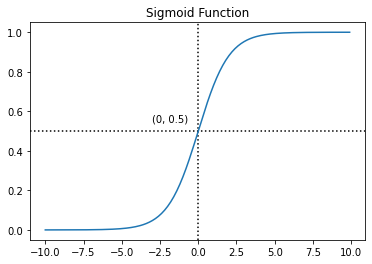

Evaluate sigmoid(0) = 0.5


In [ ]:
# Crear la función sigmoidea.
def sigmoid(z):
    """
    The sigmoid function.
    Args:
        z: float, vector, matrix
    Returns:
        sigmoid: float
    """
    sigmoid = 1 / (1 + np.exp(-z))
    return sigmoid

# Visualizar la función sigmoidea
x = np.arange(-10, 10, 0.1)
plt.axhline(y=0.5, c='black', ls=':')
plt.axvline(x=0, c='black', ls=':')
plt.annotate('(0, 0.5)', xy=(0, 0.5), xytext=(-3, 0.55))
plt.plot(x, sigmoid(x))
plt.title('Sigmoid Function')
plt.show()

print('Evaluate sigmoid(0) =', sigmoid(0))


# Función de coste y gradiente
Implementar la función de coste y el gradiente para la regresión logística. La función de coste en la regresión logística es:

In [ ]:
# Obtenga el número de características.
n = len(data1.columns)-1 # restar 1 a la columna de destino

# Crear una función para peparar los datos.
def prepareData(data, n):
    """
    Add 1s column, convert to arrays,
    initialize theta.
    Args:
        data: read the data file
        n: int
    Return:
        x: a (m, n+1) array
        y: a (m, 1) array
        theta: a (n+1, 1) array
    """
    # Añade una columna con 1s en el conjunto de datos.
    data.insert(0, 'Ones', 1)

    # Defina x e y, separando el conjunto de datos.
    x = data.iloc[:, 0:n+1]
    y = data.iloc[:, n+1:n+2]

    # Convertir a arrays, por lo que esta función es
# compatible con scipy.optimize.fmin posteriormente.
# Inicializar los parámetros theta a 0s.
# Theta es un array (n+1, 1),
# donde n es el número de características.
    x = np.array(x.values)
    y = np.array(y.values)
    theta = np.zeros((n+1, 1))
    return x, y, theta

x, y, theta = prepareData(data1, n)

print('Checking the dimensions of the matrices x, y, theta...')
print(x.shape, y.shape, theta.shape)

Checking the dimensions of the matrices x, y, theta...
(100, 3) (100, 1) (3, 1)


In [9]:
# Crear una función para calcular el coste.
# ¡¡¡NOTA!!! Los parámetros deben estar en el orden correcto!!!.
# El computeCost(theta, x, y) es el orden correcto,
# asumiendo que x e y en computeCost están destinados
# para que coincidan con los args=(x, y) más adelante en la función fmin.
def computeCost(theta, x, y):
    """
    Compute the cost function.
    Args:
        theta: array shape(n+1, 1) 
        x: array shape(m, n+1) 
        y: array shape(m, 1)
    Returns:
        cost: float
    """
    m = len(x)
    # Realiza la multiplicación de matrices con numpy.dot
    h_theta = sigmoid(np.dot(x, theta))
    term1 = np.dot(-y.T, np.log(h_theta))
    term2 = np.dot((1 - y).T, np.log(1 - h_theta))
    cost = np.sum(term1 - term2) / m
    return cost

print('El coste con θ inicial igual a cero, es:')
print(computeCost(theta, x, y))

El coste con θ inicial igual a cero, es:
0.6931471805599453
